# k-Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
df = pd.read_csv("C:/Users/dell/Documents/diabeties.csv")
df.head()

Number of times pregnant  Glucose  blood pressure  skin thickness  insulin  \
0                         6      148              72              35        0   
1                         1       85              66              29        0   
2                         8      183              64               0        0   
3                         1       89              66              23       94   
4                         0      137              40              35      168   

   Body Mass Index  Diabeties pedigree function  Age  Outcome  
0             33.6                        0.627   50        1  
1             26.6                        0.351   31        0  
2             23.3                        0.672   32        1  
3             28.1                        0.167   21        0  
4             43.1                        2.288   33        1

In [2]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (768, 9)


In [3]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], stratify=df['Outcome'], random_state=66)

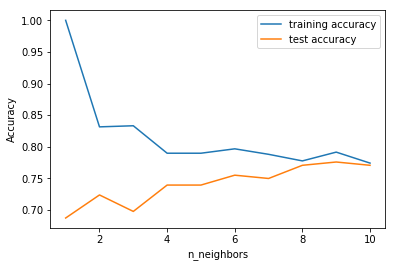

In [5]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
num_neighbors = range(1, 11)

for n_neighbors in num_neighbors:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(num_neighbors, training_accuracy, label="training accuracy")
plt.plot(num_neighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. The best performance is somewhere around 9 neighbors.

The above plot suggests that we should choose n_neighbors=9.

In [6]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN on training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN on test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN on training set: 0.792
Accuracy of K-NN on test set: 0.776


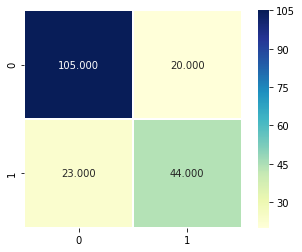

In [7]:
pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,fmt="0.3f",linewidths=0.5,square=True, cmap = 'YlGnBu')